In [2]:
# Lib imports for Data Reading, Partition into training and testing set: Standard size 70-30%
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler  # Scale down the training data & conversion into Array

In [3]:
df = pd.read_csv ('./NFLX.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.800000,1.800000,1.645714,1.702857,1.702857,11334400
2005-01-04,1.702857,1.707143,1.607143,1.665714,1.665714,17352300
2005-01-05,1.677143,1.677143,1.584286,1.600000,1.600000,12732300
2005-01-06,1.600000,1.624286,1.572857,1.578571,1.578571,8273300
2005-01-07,1.587143,1.650000,1.571429,1.588571,1.588571,7490700


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.800000,1.800000,1.645714,1.702857,1.702857,11334400
1,2005-01-04,1.702857,1.707143,1.607143,1.665714,1.665714,17352300
2,2005-01-05,1.677143,1.677143,1.584286,1.600000,1.600000,12732300
3,2005-01-06,1.600000,1.624286,1.572857,1.578571,1.578571,8273300
4,2005-01-07,1.587143,1.650000,1.571429,1.588571,1.588571,7490700


In [5]:
df=df.drop(['Date', 'Adj Close'], axis =1)

In [6]:
df.tail()

,Open,High,Low,Close,Volume
4692,425.410004,427.589996,406.170013,406.929993,5687800
4693,412.000000,419.250000,407.559998,416.029999,5390900
4694,418.040009,419.829987,413.269989,418.059998,2928600
4695,416.000000,432.170013,414.500000,429.989990,4486700
4696,430.850006,438.160004,428.350006,434.670013,3625400


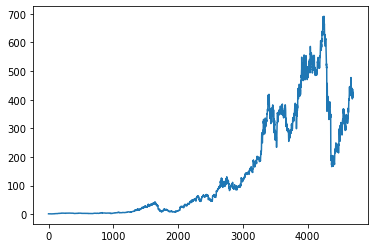

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
ma300 = df.Close.rolling(300).mean()

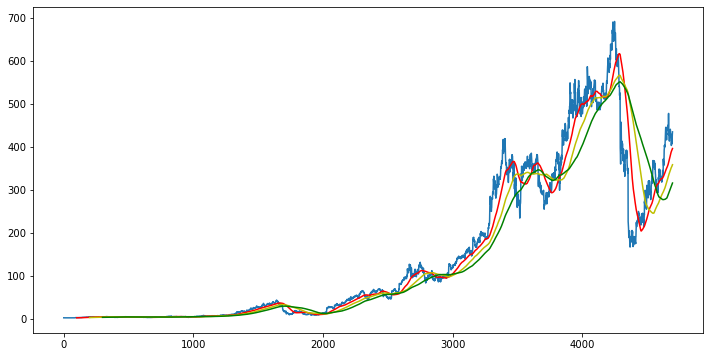

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'y')
plt.plot(ma300,'g')

In [10]:
df.shape

(4697, 5)

In [11]:
#Splitting data into Training & Testing set
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3287, 1)
(1410, 1)


In [12]:
Scaler=MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array=Scaler.fit_transform(data_training)

In [14]:
X_train=[]
Y_train=[]
for i in range (100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    Y_train.append(data_training_array[i,0])
    
X_train,Y_train= np.array(X_train), np.array(Y_train)

In [15]:
# Creation of Machine Learning Model Using LSTM 
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

2023-12-01 00:32:40.528830: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 00:32:40.581482: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 00:32:40.582337: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 00:32:41.468906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
model= Sequential()
model.add(LSTM(units=40, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=160, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

2023-12-01 00:32:47.222452: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 40)           6720      
                                                                 
 dropout (Dropout)           (None, 100, 40)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 80)           38720     
                                                                 
 dropout_1 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 120)          96480     
                                                                 
 dropout_2 (Dropout)         (None, 100, 120)          0         
                                                                 
 lstm_3 (LSTM)               (None, 160)               1

In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
100/100 [==============================] - 31s 259ms/step - loss: 0.0103
Epoch 2/50
100/100 [==============================] - 26s 256ms/step - loss: 0.0024
Epoch 3/50
100/100 [==============================] - 27s 270ms/step - loss: 0.0023
Epoch 4/50
100/100 [==============================] - 27s 270ms/step - loss: 0.0018
Epoch 5/50
100/100 [==============================] - 29s 285ms/step - loss: 0.0019
Epoch 6/50
100/100 [==============================] - 27s 272ms/step - loss: 0.0019
Epoch 7/50
100/100 [==============================] - 29s 288ms/step - loss: 0.0019
Epoch 8/50
100/100 [==============================] - 29s 288ms/step - loss: 0.0019
Epoch 9/50
100/100 [==============================] - 29s 286ms/step - loss: 0.0020
Epoch 10/50
100/100 [==============================] - 27s 270ms/step - loss: 0.0020
Epoch 11/50
100/100 [==============================] - 30s 303ms/step - loss: 0.0017
Epoch 12/50
100/100 [==============================] - 29s 288ms/step - lo

In [19]:
model.save('Keras_LSTM_Model.keras')

In [27]:
past_100_days = data_training.tail(100)

In [28]:
#final_df= past_100_days.append(data_testing, ignore_index = True) 
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()


,Close
0,174.690002
1,174.710007
2,174.740005
3,174.520004
4,179.250000


In [31]:
input_data=Scaler.fit_transform(final_df)

In [32]:
input_data

array([[0.01583798],
       [0.01587606],
       [0.01593316],
       ...,
       [0.47911749],
       [0.50182744],
       [0.51073634]])

In [33]:
input_data.shape

(1510, 1)

In [35]:
x_test=[]
y_test=[]

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [36]:
x_test, y_test= np.array(x_test), np.array(y_test)

In [37]:
print(x_test.shape)
print(y_test.shape)

(1410, 100, 1)
(1410,)


In [38]:
# Making Preditciton for the Real Time Data

y_predicted=model.predict(x_test)

45/45 [==============================] - 13s 251ms/step


In [39]:
y_predicted.shape


(1410, 1)

In [40]:
y_test


array([0.18070889, 0.19669918, 0.20602682, ..., 0.47911749, 0.50182744,
       0.51073634])

In [41]:
y_predicted

array([[0.0414492 ],
       [0.04500963],
       [0.0490222 ],
       ...,
       [0.4125322 ],
       [0.41062132],
       [0.40879685]], dtype=float32)

In [44]:
Scaler.scale_

array([0.0019036])

In [45]:
scale_factor= 1/0.0019036

In [46]:
y_predicted = y_predicted * scale_factor
y_test=y_test* scale_factor

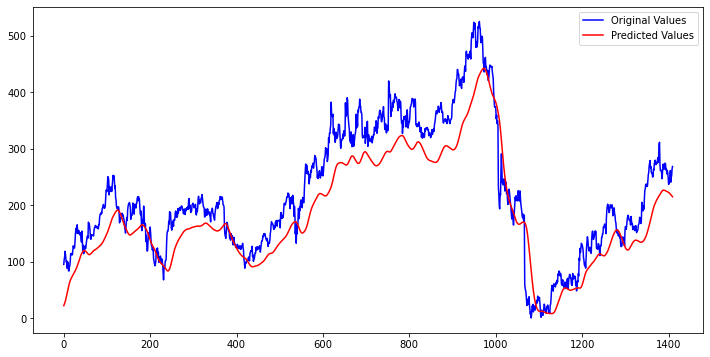

In [47]:
# Plotting the Predictions Vs Original Value Plot

plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Values')
plt.plot(y_predicted,'r', label='Predicted Values')
plt.xlabel=('TIME')
plt.ylabel=('PRICE')
plt.legend()
plt.show()